<a href="https://colab.research.google.com/github/ganyaGG/MIPHI/blob/main/%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D0%B0%D0%BB%D0%B3%D0%B5%D0%B1%D1%80%D0%B0_%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%E2%84%961_(HW).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [ ]:
from dis import disco

# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков
import plotly.figure_factory as ff
import plotly.express as px
from mpmath.libmp import normalize

%matplotlib inline

Прочитаем исходные данные:

In [ ]:
data = pd.read_csv('data/unconv.csv')
print(data.shape)
data.head()

(200, 8)


,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов.

Сделайте промежуточные выводы из проведённого разведывательного анализа.

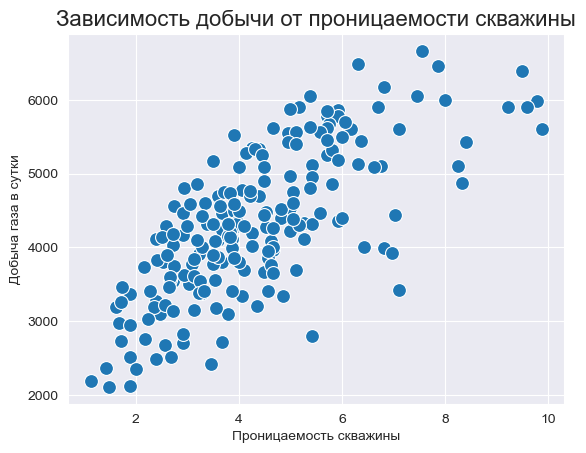

In [ ]:
# Ваш код здесь
scatterplot = sns.scatterplot(
    data=data,
    x='Perm',
    y='Prod',
    s=100

)
scatterplot.set_title('Зависимость добычи от проницаемости скважины', fontsize=16)
scatterplot.set_xlabel('Проницаемость скважины')
scatterplot.set_ylabel('Добыча газа в сутки');

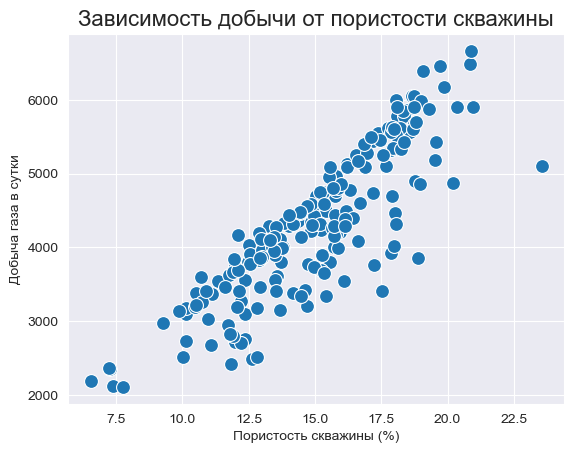

In [ ]:
# Ваш код здесь
scatterplot = sns.scatterplot(
    data=data,
    x='Por',
    y='Prod',
    s=100

)
scatterplot.set_title('Зависимость добычи от пористости скважины', fontsize=16)
scatterplot.set_xlabel('Пористость скважины (%)')
scatterplot.set_ylabel('Добыча газа в сутки');

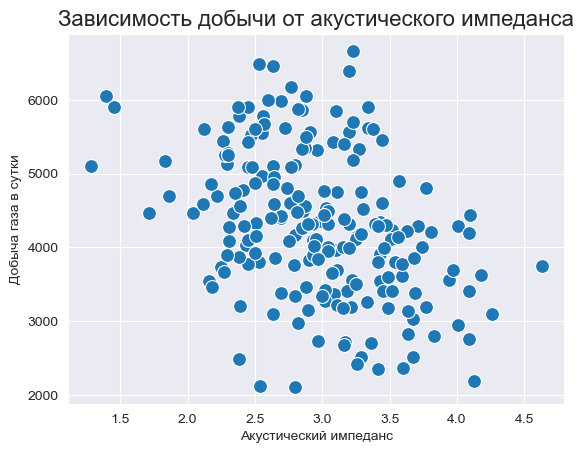

In [ ]:
scatterplot = sns.scatterplot(
    data=data,
    x='AI',
    y='Prod',
    s=100

)
scatterplot.set_title('Зависимость добычи от акустического импеданса', fontsize=16)
scatterplot.set_xlabel('Акустический импеданс')
scatterplot.set_ylabel('Добыча газа в сутки');

На графиках видна прямая зависимость добычи от пористости и проницаемости скважины и отсутствие зависимости от акустического импеданса.

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак.

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты.

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных?
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**):
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы.

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [ ]:
# Ваш код здесь
corr_matrix = data.corr()

# Считаем определитель
det = np.linalg.det(corr_matrix)
# считаем ранг
rank = np.linalg.matrix_rank(corr_matrix)

print(f'Ранг матрицы корреляций = {rank}, а определитель = {det}')

fig = px.imshow(corr_matrix, color_continuous_scale='Viridis')
fig.show()

Ранг матрицы корреляций = 8, а определитель = 0.0007299388072652082


1) Сильнее всего с целевым показателем коррелируют показатели Por, Perm и TOC.
2) Корреляционная матрица плохо обусловлена, так как ее определитель (0.00073) довольно близок к нулю.
3) В данных отсутствуют как чистая коллинеарность, так и мультиколлинеарность - нет абсолютно связанных факторов как между собой, так и с целевым показателем и ранг матрицы равен ее размеру. Однако присутствуют сильно связанные между собой факторы и определитель близок к нулю, что говорит о высокой мультиколлинеарности.
4) Модель классической линейной регрессии применима, но требуется предварительная очистка данных от лишних факторов.

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки.

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy.

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**):
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [ ]:
# Ваш код здесь
x = np.column_stack((np.ones(data.shape[0]),data[['Well', 'Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR']]))
y = data[['Prod']]

w_hat = np.linalg.inv(x.T@x)@x.T@y
print(np.round(w_hat.values, 0))

[[-1232.]
 [    0.]
 [  230.]
 [  116.]
 [ -365.]
 [   25.]
 [  -78.]
 [  785.]]


1) Есть шумовой фактор - Well, его влияние близко к 0. Это логично, так как данный показатель является просто идентификатором скважины.
2) При увеличении пористости на 1% добыча вырастает на 230 млн. кубических футов в сутки.
3) При увеличении проницаемость на 1 добыча вырастает на 116 млн. кубических футов в сутки.
4) При увеличении коэффициента хрупкости на 1 % добыча снижается на 365 млн. кубических футов в сутки.

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной.

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день.

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**):
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [ ]:
# Ваш код здесь
# 5.2 a)
new_data = {
    'w0': 1,
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
}
new_data = np.array(list(new_data.values()))

new_prod_predict = (new_data@w_hat).iloc[0]
print(f'Прогнозируемая выработка для новой скважины {new_prod_predict}')

new_prod_real = 4748.315024

print(f'Абсолютная ошибка прогноза равна {abs(new_prod_real - new_prod_predict)}')


Прогнозируемая выработка для новой скважины 4723.064053707194
Абсолютная ошибка прогноза равна 25.250970292806414


In [ ]:
# 5.2 б)
prediction = x@w_hat
avg_deviation = (np.abs(data['Prod'] - prediction['Prod'])).sum() / data.shape[0]
avg_square_deviation = ((data['Prod'] - prediction['Prod']) ** 2).sum() / data.shape[0]
print(f'Среднее отклонение реальных данных от прогноза = {avg_deviation}')
print(f'Среднее квадратическое отклонение реальных данных от прогноза = {avg_square_deviation}')


Среднее отклонение реальных данных от прогноза = 153.62297086558314
Среднее квадратическое отклонение реальных данных от прогноза = 39315.04014026637


Выводы:
1) Для предложенной скважины прогноз получился с относительно небольшой ошибкой - 25
2) Среднее отклонение (и среднеквадратичное отклонение) для всех данных получилось уже довольно большим, что говорит о недостаточном качестве построенной модели

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**).

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

In [ ]:
# Выведем еще раз корреляцию параметров с целевым признаком и коэффициенты.
display(corr_matrix.loc['Prod'])

print(np.round(w_hat, 0))


Well       0.026817
Por        0.861910
Perm       0.727426
AI        -0.390835
Brittle    0.237155
TOC        0.654445
VR         0.323182
Prod       1.000000
Name: Prod, dtype: float64

     Prod
0 -1232.0
1     0.0
2   230.0
3   116.0
4  -365.0
5    25.0
6   -78.0
7   785.0


Мы видим, что параметр TOC имеет довольно высокую прямую корреляцию с выработкой, но при этом отрицательный коэффициент. На мой взгляд это говорит об ошибке в модели. Скорее всего такой результат связан с наличием искажающих параметров.

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики).

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее.
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**):
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [ ]:
# Ваш код здесь
cleaned_data = data.drop(['Perm', 'Well'], axis=1)

x_clean = np.column_stack((np.ones(cleaned_data.shape[0]), cleaned_data[['Por', 'AI', 'Brittle', 'TOC', 'VR']]))
y_clean = cleaned_data[['Prod']]

w_hat_clean = np.linalg.inv(x_clean.T@x_clean)@x_clean.T@y_clean
print(np.round(w_hat_clean.values, 0))

[[-1889.]
 [  290.]
 [ -140.]
 [   29.]
 [   89.]
 [  407.]]


1) При увеличении параметра Por на 1% добыча вырастает на 290 млн. кубических футов в сутки. Предыдущее значение 230 - влияние фактора на результат выросло.
2) При увеличении параметра AI на 1 добыча снизится на 140 млн. кубических футов в сутки. Предыдущее значение (-365) - влияние фактора на результат снизилось.
3) При увеличении параметра TOC на 1% добыча вырастает на 89 млн. кубических футов в сутки. Предыдущее значение (-78) - коэффициент сменил знак и теперь соответствует направлению связи по матрице корреляции.

In [ ]:
prediction_clean = x_clean@w_hat_clean
avg_deviation_clean = (np.abs(cleaned_data['Prod'] - prediction_clean['Prod'])).sum() / cleaned_data.shape[0]
avg_square_deviation_clean = ((cleaned_data['Prod'] - prediction_clean['Prod']) ** 2).sum() / cleaned_data.shape[0]
print(f'Среднее отклонение очищенных реальных данных от прогноза = {avg_deviation_clean}')
print(f'Среднее квадратическое отклонение очищенных реальных данных от прогноза = {avg_square_deviation_clean}')

Среднее отклонение очищенных реальных данных от прогноза = 170.36541690392303
Среднее квадратическое отклонение очищенных реальных данных от прогноза = 53393.67973621555


4) Отклонение прогноза от факта по-прежнему высоко и даже увеличилось - модель по-прежнему дает большую ошибку.
5) Побороть разнонаправленность корреляций и коэффициентов удалось.

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**):
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [ ]:
# Ваш код здесь
from sklearn.linear_model import LinearRegression

# создаём модель линейной регрессии
lr = LinearRegression(fit_intercept=False)
# вычисляем коэффициенты регрессии
lr.fit(x_clean, y_clean)

print('Коэффициенты, посчитанные библиотекой sklearn:', np.round(lr.coef_))

# посчитаем прогноз для всех данных
new_prediction_lr = lr.predict(x_clean)
# для удобства представим прогноз в виде датафрейма
df_prediction_lr = pd.DataFrame(new_prediction_lr)

# посчитаем метрики среднего абсолютного (MAE) и среднего квадратического (MSE) отклонений
lr_mae = (np.abs(cleaned_data['Prod'] - df_prediction_lr[0])).sum() / cleaned_data.shape[0]
lr_mse = ((cleaned_data['Prod'] - df_prediction_lr[0]) ** 2).sum() / cleaned_data.shape[0]

print(f'Среднее отклонение, посчитанное библиотекой sklearn = {lr_mae}')
print(f'Среднее квадратическое отклонение, посчитанное библиотекой sklearn = {lr_mse}')

Коэффициенты, посчитанные библиотекой sklearn: [[-1889.   290.  -140.    29.    89.   407.]]
Среднее отклонение, посчитанное библиотекой sklearn = 170.36541690392488
Среднее квадратическое отклонение, посчитанное библиотекой sklearn = 53393.67973621556


Видим, что коэффициенты и метрики ошибок, полученные с помощью библиотеки numpy и с помощью библиотеки sklearn, аналогичны.

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию.

Приступим! Выполните задания 8.1–8.5:


In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`.

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**):
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [ ]:
# Ваш код здесь
X = cleaned_data[['Por', 'AI', 'Brittle', 'TOC', 'VR']]
y = cleaned_data['Prod']

scaler = StandardScaler()
# стандартизируем признаки
X_scaled = scaler.fit_transform(X)

poly = PolynomialFeatures(degree=3, include_bias=False)
# добавляем полиномиальные признаки
X_poly = poly.fit_transform(X_scaled)

print(f'Количество получившихся факторов = {X_poly.shape[1]}')

# создаем модель линейной регрессии с интерцептом
lr_poly = LinearRegression(fit_intercept=True)
# проводим кросс-валидацию по двум метрикам
lr_poly_mae = cross_validate(lr_poly, X_poly, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
lr_poly_mse = cross_validate(lr_poly, X_poly, y, scoring='neg_mean_squared_error', cv=5, return_train_score=True)

print('MAE на тренировочных фолдах: {:.2f}'.format(-lr_poly_mae['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-lr_poly_mae['test_score'].mean()))
print('MSE на тренировочных фолдах: {:.2f}'.format(-lr_poly_mse['train_score'].mean()))
print('MSE на валидационных фолдах: {:.2f}'.format(-lr_poly_mse['test_score'].mean()))

Количество получившихся факторов = 55
MAE на тренировочных фолдах: 61.91
MAE на валидационных фолдах: 116.97
MSE на тренировочных фолдах: 6809.78
MSE на валидационных фолдах: 24965.78


Выводы:
1) Обе метрики значительно снизились, по сравнению с обычной линейной регрессией, что говорит о повышении качества модели.
2) Для обеих метрик видно значительное отличие значений между тренировочными и валидационными фолдами, что говорит о переобученности модели, но неудивительно, учитывая малое количество наблюдений в исходном датасете.

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы.

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**):
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [ ]:
# Ваш код здесь
# Создание словаря, содержащего потенциальные значения альфа
alpha_values = {'alpha': [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20]}

# Передача в GridSearchCV модели, потенциальных альфа-значений,
# метрики качества
lasso_gs = GridSearchCV(Lasso(fit_intercept=True, max_iter=10000),
                     alpha_values,
                     scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'],
                     refit='neg_mean_absolute_error',
                     cv=5)

# лучшие найденные гиперпараметры
best_params_lasso = lasso_gs.fit(X_poly, y).best_params_
alpha_lasso = best_params_lasso['alpha']

print('Лучшее значение alpha:', alpha_lasso)

# создаем модель
lasso = Lasso(alpha=alpha_lasso, fit_intercept=True)

# проводим кросс-валидацию по двум метрикам
lasso_mae = cross_validate(lasso, X_poly, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
lasso_mse = cross_validate(lasso, X_poly, y, scoring='neg_mean_squared_error', cv=5, return_train_score=True)

print('MAE на тренировочных фолдах: {:.2f}'.format(-lasso_mae['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-lasso_mae['test_score'].mean()))
print('MSE на тренировочных фолдах: {:.2f}'.format(-lasso_mse['train_score'].mean()))
print('MSE на валидационных фолдах: {:.2f}'.format(-lasso_mse['test_score'].mean()))

Лучшее значение alpha: 4
MAE на тренировочных фолдах: 71.32
MAE на валидационных фолдах: 88.98
MSE на тренировочных фолдах: 9349.06
MSE на валидационных фолдах: 14651.15


Использование $L_1$-регуляризации повысило качество модели:
1) значение метрик ошибок на валидационных фолдах снизилось по сравнению с полиномиальной регрессией
2) разница между значениями метрик на тренировочных и валидационных фолдах снизилась, что говорит о снижении переобученности модели.

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы.

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [ ]:
# Ваш код здесь
# Передача в GridSearchCV модели, потенциальных альфа-значений,
# метрики качества
ridge_gs = GridSearchCV(Ridge(fit_intercept=True),
                        alpha_values,
                        scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'],
                        refit='neg_mean_absolute_error',
                        cv=5)

# лучшие найденные гиперпараметры
best_params_ridge = ridge_gs.fit(X_poly, y).best_params_
alpha_ridge = best_params_ridge['alpha']

print('Лучшее значение alpha:', alpha_ridge)

# создаем модель
ridge = Ridge(alpha=alpha_ridge, fit_intercept=True)

# проводим кросс-валидацию по двум метрикам
ridge_mae = cross_validate(ridge, X_poly, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
ridge_mse = cross_validate(ridge, X_poly, y, scoring='neg_mean_squared_error', cv=5, return_train_score=True)

print('MAE на тренировочных фолдах: {:.2f}'.format(-ridge_mae['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-ridge_mae['test_score'].mean()))
print('MSE на тренировочных фолдах: {:.2f}'.format(-ridge_mse['train_score'].mean()))
print('MSE на валидационных фолдах: {:.2f}'.format(-ridge_mse['test_score'].mean()))

Лучшее значение alpha: 1
MAE на тренировочных фолдах: 65.19
MAE на валидационных фолдах: 105.37
MSE на тренировочных фолдах: 7648.93
MSE на валидационных фолдах: 19414.05


Хотя значения метрик показывают, что использование $L_2$-регуляризации повысило качество модели по сравнению с полиномиальной регрессией (меньше значение метрик на валидационных фолдах и меньше разброс между тренировочными и валидационными фолдами), по сравнению с $L_1$-регуляризацией качество снизилось как по значению метрик, так и по разбросу значений между тренировочными и валидационными фолдами.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**):
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы.

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**):
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [ ]:
# Ваш код здесь
import warnings
warnings.filterwarnings('ignore')

grid_values = {
    'alpha': [0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20],
    'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
}
# Передача в GridSearchCV модели, потенциальных альфа-значений,
# метрики качества
en_gs = GridSearchCV(ElasticNet(fit_intercept=True, max_iter=10000),
                        grid_values,
                        scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'],
                        refit='neg_mean_absolute_error',
                        cv=5)

# лучшие найденные гиперпараметры
best_params_en = en_gs.fit(X_poly, y).best_params_
alpha_en = best_params_en['alpha']
l1_ratio_en = best_params_en['l1_ratio']

print(f'Лучшее значение alpha: {alpha_en}, l1_ratio: {l1_ratio_en}')

# создаем модель
en = ElasticNet(alpha=alpha_en, l1_ratio=l1_ratio_en, fit_intercept=True)

# проводим кросс-валидацию по двум метрикам
en_mae = cross_validate(en, X_poly, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
en_mse = cross_validate(en, X_poly, y, scoring='neg_mean_squared_error', cv=5, return_train_score=True)

print('MAE на тренировочных фолдах: {:.2f}'.format(-en_mae['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-en_mae['test_score'].mean()))
print('MSE на тренировочных фолдах: {:.2f}'.format(-en_mse['train_score'].mean()))
print('MSE на валидационных фолдах: {:.2f}'.format(-en_mse['test_score'].mean()))



Лучшее значение alpha: 0.1, l1_ratio: 0.9
MAE на тренировочных фолдах: 68.26
MAE на валидационных фолдах: 106.35
MSE на тренировочных фолдах: 8351.25
MSE на валидационных фолдах: 19604.80


1) Из расчетов намеренно были исключены пограничные значения l1_ratio, так как два чистых варианта регуляризации были рассмотрены отдельно выше.
2) Результаты на валидационных фолдах получились хуже, чем в обоих чистых вариантах.
3) Большой разброс значений между тренировочными и валидационными фолдами говорит о переобучении модели.
4) Параметр l1_ratio принял максимальное из возможных значений, то есть модель стремится к $L_1$-регуляризации.

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**):
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [ ]:
# сначала для полноты данных проведем кросс-валидацию модели линейной регрессии без полиномиальных признаков
lr_mae = cross_validate(lr, x_clean, y_clean, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
lr_mse = cross_validate(lr, x_clean, y_clean, scoring='neg_mean_squared_error', cv=5, return_train_score=True)

print('MAE на тренировочных фолдах: {:.2f}'.format(-lr_mae['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-lr_mae['test_score'].mean()))
print('MSE на тренировочных фолдах: {:.2f}'.format(-lr_mse['train_score'].mean()))
print('MSE на валидационных фолдах: {:.2f}'.format(-lr_mse['test_score'].mean()))

MAE на тренировочных фолдах: 169.63
MAE на валидационных фолдах: 179.87
MSE на тренировочных фолдах: 52763.70
MSE на валидационных фолдах: 59199.52


In [ ]:
# Ваш код здесь
# создадим справочник из данных по моделям
dict = {
    'Модель': ['Lineal', 'Polynomial', 'Lasso', 'Ridge', 'ElasticNet'],
    'Гиперпараметры': [np.nan, np.nan, best_params_lasso, best_params_ridge, best_params_en],
    'Полиномиальные признаки': [False, True, True, True, True],
    'MAE train': [-lr_mae['train_score'].mean(),-lr_poly_mae['train_score'].mean(),-lasso_mae['train_score'].mean(),-ridge_mae['train_score'].mean(),-en_mae['train_score'].mean()],
    'MAE test': [-lr_mae['test_score'].mean(),-lr_poly_mae['test_score'].mean(),-lasso_mae['test_score'].mean(),-ridge_mae['test_score'].mean(),-en_mae['test_score'].mean()],
    'MSE train': [-lr_mse['train_score'].mean(),-lr_poly_mse['train_score'].mean(),-lasso_mse['train_score'].mean(),-ridge_mse['train_score'].mean(),-en_mse['train_score'].mean()],
    'MSE test': [-lr_mse['test_score'].mean(),-lr_poly_mse['test_score'].mean(),-lasso_mse['test_score'].mean(),-ridge_mse['test_score'].mean(),-en_mse['test_score'].mean()],
}

# создаем датафрейм
df = pd.DataFrame(dict)

# для удобства анализа добавим столбцы с отклонением метрик между валидационными и тренировочными фолдами
df['MAE dev'] = df['MAE test'] - df['MAE train']
df['MSE dev'] = df['MSE test'] - df['MSE train']
df

,Модель,Гиперпараметры,Полиномиальные признаки,MAE train,MAE test,MSE train,MSE test,MAE dev,MSE dev
0,Lineal,NaN,False,169.631878,179.871065,52763.700219,59199.517278,10.239186,6435.817059
1,Polynomial,NaN,True,61.913339,116.969121,6809.782493,24965.782790,55.055782,18156.000297
2,Lasso,{'alpha': 4},True,71.316109,88.976787,9349.064406,14651.152635,17.660678,5302.088229
3,Ridge,{'alpha': 1},True,65.192889,105.371899,7648.930915,19414.045227,40.179010,11765.114312
4,ElasticNet,"{'alpha': 0.1, 'l1_ratio': 0.9}",True,68.256934,106.351305,8351.250769,19604.796009,38.094370,11253.545239


С точки зрения переобученности модели лучше всего себя показали обычная линейная регрессия (минимальное отклонение по MAE) и $L_1$-регуляризация (минимальное отклонение по MSE).
С точки зрения результата на валидационных фолдах лучше всего себя показала $L_1$-регуляризация - и MAE и MSE минимальны.
Таким образом, наиболее качественной в даноом случае является модель $L_1$-регуляризации.